In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from pydlts.fsmodels import SklMultiExpFrequencyScan
from pydlts.fsplots import plot_loss_path

%matplotlib inline

Генерация исходных данных

In [2]:
rng = np.random.default_rng(12345)

In [3]:
X = np.linspace(0.5, 3.5, 10)
y = 1 + 0.5 * X + rng.normal(loc=0, scale=0.5, size=X.shape[0])

X = np.c_[X]
y = np.c_[y]

Линейная регрессия

In [4]:
lin_regr = LinearRegression()
lin_regr.fit(X, y)

X_regr = np.c_[np.linspace(0.0, 4.0, 200)]

y_pred_lin_regr = lin_regr.predict(X_regr)

print(f'Коэффициенты линейной регрессии: {float(lin_regr.intercept_), float(lin_regr.coef_)}')

Коэффициенты линейной регрессии: (0.9150415401777493, 0.43205762091456695)


Полиномиальная регрессия

In [5]:
n = 10
poly_regr = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=n, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regresstion', LinearRegression()),
])
poly_regr.fit(X, y)

y_pred_poly_regr = poly_regr.predict(X_regr)

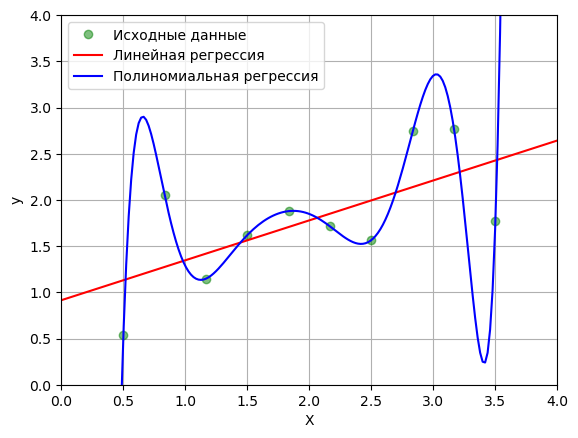

In [6]:
plt.plot(X, y, 'og', alpha = 0.5, label='Исходные данные')
plt.plot(X_regr, y_pred_lin_regr, '-r', label='Линейная регрессия')
plt.plot(X_regr, y_pred_poly_regr, '-b', label='Полиномиальная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.grid()
plt.legend(loc='upper left')

plt.savefig('../images/overfitting_polynomial.pdf', bbox_inches='tight')

plt.show()

RMSE для линейной регрессии

In [7]:
mean_squared_error(y, lin_regr.predict(X), squared=False)

0.4774914653110114

RMSE для полиномиальной регрессии

In [8]:
mean_squared_error(y, poly_regr.predict(X), squared=False)

4.241976544502724e-11

Применение модели многоэкспоненциального частотного скана

In [9]:
fs = SklMultiExpFrequencyScan(n_exps=10, stop_val=10**-5, verbose=True)

fs.fit(X, y)

2022-10-12 21:26:15.229467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 21:26:15.254541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 21:26:15.254697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 21:26:15.255188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

iteration # 0
loss: 5.47157725832232
exps_params:
[[-1.98066902  0.01542228]
 [-3.25910372  0.01422913]
 [-3.32392764 -0.07645504]
 [-1.12645816  0.02617043]
 [-3.33893551 -0.04147465]
 [-3.28802738  0.02734612]
 [-2.85384827  0.02933221]
 [-2.41647366  0.03672962]
 [-2.76172872  0.04704606]
 [-1.43595829  0.04851303]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 1
loss: 2.91285852214436
exps_params:
[[-1.98131472  0.14319098]
 [-3.25854242  0.16500793]
 [-3.32865281  0.07277696]
 [-1.12972623  0.11918567]
 [-3.34172752  0.10727676]
 [-3.28668458  0.17753791]
 [-2.85472681  0.17692026]
 [-2.41766679  0.17486906]
 [-2.76324054  0.19261248]
 [-1.4392493   0.16020168]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 2
loss: 1.6978461143081518
exps_params:
[[-1.98213513  0.23431176]
 [-3.25860211  0.26718359]
 [-3.32745175  0.1749759

iteration # 19
loss: 0.17541833774690965
exps_params:
[[-1.87338059  0.51663094]
 [-3.49916731  0.55045547]
 [-3.50610018  0.4710368 ]
 [-1.21799961  0.56920283]
 [-3.5246132   0.51046546]
 [-3.51901215  0.57147128]
 [-2.95373182  0.39715241]
 [-2.26069748  0.46714665]
 [-2.74727799  0.4044385 ]
 [-1.34423311  0.63193683]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 20
loss: 0.1731526285731772
exps_params:
[[-1.87475394  0.51796224]
 [-3.50359787  0.55340027]
 [-3.50969562  0.47401717]
 [-1.21841942  0.57350368]
 [-3.52794038  0.51353222]
 [-3.52292996  0.57451323]
 [-2.95586028  0.39534719]
 [-2.25880582  0.46913579]
 [-2.74356947  0.40292917]
 [-1.33960355  0.63597579]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 21
loss: 0.17133465763972278
exps_params:
[[-1.87657551  0.51896514]
 [-3.50737588  0.55601609]
 [-3.51276408  

iteration # 38
loss: 0.15873529146281012
exps_params:
[[-1.93522931  0.51569164]
 [-3.52645013  0.5766311 ]
 [-3.52798501  0.49735733]
 [-1.22958764  0.6072538 ]
 [-3.54046187  0.53723834]
 [-3.53845567  0.59814868]
 [-2.98375637  0.36199074]
 [-2.25643525  0.49033682]
 [-2.67526868  0.37952866]
 [-1.29164065  0.66804997]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 39
loss: 0.1582440415976259
exps_params:
[[-1.93915499  0.5150824 ]
 [-3.5264824   0.57725623]
 [-3.52797848  0.49798256]
 [-1.23040288  0.60830401]
 [-3.54015691  0.53786198]
 [-3.53816892  0.59877287]
 [-2.98535015  0.3601053 ]
 [-2.25674589  0.49097238]
 [-2.67164799  0.37829702]
 [-1.29023398  0.66908609]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 40
loss: 0.15775967946488226
exps_params:
[[-1.94307897  0.51446177]
 [-3.5264721   0.57785843]
 [-3.52793619  

iteration # 57
loss: 0.15035319651038526
exps_params:
[[-2.0077657   0.50343914]
 [-3.52295551  0.58610016]
 [-3.52437835  0.50682184]
 [-1.24516261  0.62557262]
 [-3.53208325  0.54664233]
 [-3.53009999  0.60756896]
 [-3.01796081  0.32713528]
 [-2.26183994  0.49718008]
 [-2.61125374  0.35731886]
 [-1.27593785  0.6863806 ]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 58
loss: 0.14996197088728336
exps_params:
[[-2.01139798  0.5028072 ]
 [-3.5226561   0.58651011]
 [-3.52408877  0.50723136]
 [-1.24593389  0.62649043]
 [-3.53159339  0.54704859]
 [-3.52960602  0.60797621]
 [-3.01993868  0.325388  ]
 [-2.26209624  0.49731776]
 [-2.60816043  0.35624448]
 [-1.27558178  0.68730539]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 59
loss: 0.14957562302124341
exps_params:
[[-2.01500758  0.50218017]
 [-3.52235285  0.58691385]
 [-3.52379568 

iteration # 76
loss: 0.14376178076553078
exps_params:
[[-2.07255932  0.4925108 ]
 [-3.51701191  0.59292816]
 [-3.51862387  0.51364062]
 [-1.25832572  0.64222498]
 [-3.52323779  0.55341231]
 [-3.52123026  0.6143569 ]
 [-3.05680526  0.29594105]
 [-2.26663367  0.49793567]
 [-2.55694897  0.33903651]
 [-1.27347096  0.70315209]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 77
loss: 0.14346409419464173
exps_params:
[[-2.07570316  0.49200986]
 [-3.51670245  0.59323651]
 [-3.51832227  0.51394846]
 [-1.25892951  0.64304224]
 [-3.52281007  0.55371831]
 [-3.52080494  0.61466377]
 [-3.058885    0.29442113]
 [-2.26688874  0.49790277]
 [-2.55434343  0.33820387]
 [-1.2735235   0.70397415]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 78
loss: 0.14317124938673714
exps_params:
[[-2.07881856  0.49151712]
 [-3.51639463  0.59354026]
 [-3.51802197 

iteration # 95
loss: 0.13890047433398314
exps_params:
[[-2.12729408  0.48440719]
 [-3.51148899  0.59806266]
 [-3.5131897   0.51876557]
 [-1.26836364  0.65638363]
 [-3.51587376  0.55851175]
 [-3.51396721  0.61947087]
 [-3.0960079   0.2691555 ]
 [-2.27160956  0.4968823 ]
 [-2.51143171  0.32539666]
 [-1.27593727  0.71737673]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 96
loss: 0.13868838754953752
exps_params:
[[-2.12987767  0.48406221]
 [-3.51122233  0.59829464]
 [-3.51292423  0.51899707]
 [-1.26881247  0.65704304]
 [-3.51553012  0.55874236]
 [-3.51363159  0.61970213]
 [-3.09803559  0.26786565]
 [-2.27187824  0.49681599]
 [-2.50925893  0.32480097]
 [-1.27612098  0.71803836]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 97
loss: 0.13848032665307405
exps_params:
[[-2.13243147  0.48372504]
 [-3.51095825  0.59852322]
 [-3.51266101 

iteration # 114
loss: 0.1355035221549898
exps_params:
[[-2.17138493  0.47910399]
 [-3.50686107  0.60194564]
 [-3.50853509  0.52264028]
 [-1.27569594  0.66739501]
 [-3.51002638  0.5623745 ]
 [-3.50830082  0.62334418]
 [-3.13352144  0.2465754 ]
 [-2.2767586   0.49572556]
 [-2.4736059   0.31591575]
 [-1.27961684  0.72841687]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 115
loss: 0.13535806079264018
exps_params:
[[-2.17342217  0.47889193]
 [-3.50664252  0.6021227 ]
 [-3.50831265  0.52281695]
 [-1.27601694  0.66788791]
 [-3.50975578  0.56255077]
 [-3.50804097  0.62352091]
 [-3.13542904  0.24549541]
 [-2.2770294   0.49567476]
 [-2.47180719  0.31551556]
 [-1.27980872  0.72891069]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 116
loss: 0.1352155305903762
exps_params:
[[-2.17543233  0.47868586]
 [-3.50642636  0.60229737]
 [-3.50809239

iteration # 133
loss: 0.1331897606712397
exps_params:
[[-2.20568401  0.4759935 ]
 [-3.50309596  0.60494133]
 [-3.50466675  0.52562945]
 [-1.28085645  0.67541989]
 [-3.50542529  0.56535848]
 [-3.5039123   0.62633547]
 [-3.16845033  0.22775681]
 [-2.28180496  0.49498812]
 [-2.44238728  0.30969922]
 [-1.28297513  0.7364533 ]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 134
loss: 0.1330911480149691
exps_params:
[[-2.20724674  0.47587686]
 [-3.50291899  0.60507983]
 [-3.50448298  0.52576765]
 [-1.28107808  0.67576932]
 [-3.50521207  0.56549652]
 [-3.50371047  0.62647382]
 [-3.1702087   0.22686131]
 [-2.28206224  0.49496254]
 [-2.44090799  0.30944453]
 [-1.28313168  0.73680309]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 135
loss: 0.1329945291786095
exps_params:
[[-2.20878699  0.47576423]
 [-3.50274398  0.60521665]
 [-3.50430105 

iteration # 152
loss: 0.13161940318430693
exps_params:
[[-2.23177902  0.47437508]
 [-3.50004523  0.60731179]
 [-3.5014732   0.52799497]
 [-1.28437124  0.68101119]
 [-3.50178617  0.56772202]
 [-3.50048633  0.62870398]
 [-3.20043164  0.21221207]
 [-2.2864808   0.49469911]
 [-2.41678553  0.30582833]
 [-1.28556459  0.74204911]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 153
loss: 0.13155223596100113
exps_params:
[[-2.23295814  0.47431957]
 [-3.49990148  0.60742284]
 [-3.50132137  0.5281058 ]
 [-1.28451978  0.68125001]
 [-3.5016166   0.56783279]
 [-3.50032764  0.62881497]
 [-3.20203077  0.21147548]
 [-2.28671297  0.49469414]
 [-2.41557635  0.30567415]
 [-1.2856788   0.74228806]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 154
loss: 0.13148639262856238
exps_params:
[[-2.23411955  0.47426649]
 [-3.49975926  0.60753266]
 [-3.501171

iteration # 171
loss: 0.13054432925033238
exps_params:
[[-2.25138008  0.4736755 ]
 [-3.49755723  0.60923008]
 [-3.49882857  0.52990964]
 [-1.28670067  0.68478623]
 [-3.49887587  0.56963614]
 [-3.49777325  0.63062147]
 [-3.22938321  0.199465  ]
 [-2.2906202   0.49473392]
 [-2.39591055  0.30353653]
 [-1.28739619  0.74582589]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 172
loss: 0.1304980098998059
exps_params:
[[-2.25226192  0.47365585]
 [-3.49743936  0.60932083]
 [-3.49870241  0.53000022]
 [-1.2867978   0.68494523]
 [-3.49873931  0.56972672]
 [-3.49764646  0.63071219]
 [-3.23082413  0.19886298]
 [-2.29082169  0.49474204]
 [-2.39492737  0.30344803]
 [-1.28747435  0.74598494]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 173
loss: 0.13045256913658507
exps_params:
[[-2.25313026  0.47363755]
 [-3.49732268  0.60941065]
 [-3.4985774

iteration # 190
loss: 0.1297980238601592
exps_params:
[[-2.26600988  0.47349665]
 [-3.49550672  0.61080704]
 [-3.49662335  0.53148393]
 [-1.2882093   0.68727663]
 [-3.49651778  0.5712105 ]
 [-3.49558924  0.63219812]
 [-3.25539117  0.1890706 ]
 [-2.29416484  0.49495772]
 [-2.37897236  0.30225687]
 [-1.28862471  0.74831696]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 191
loss: 0.1297655932905491
exps_params:
[[-2.26666694  0.47349638]
 [-3.49540897  0.61088207]
 [-3.4965177   0.53155884]
 [-1.28827145  0.68738039]
 [-3.49640633  0.57128543]
 [-3.49548626  0.63227315]
 [-3.2566817   0.18858086]
 [-2.29433502  0.49497265]
 [-2.37817644  0.30220952]
 [-1.28867594  0.74842074]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 192
loss: 0.12973375157973074
exps_params:
[[-2.26731387  0.47349681]
 [-3.49531216  0.61095637]
 [-3.49641301

iteration # 209
loss: 0.12927182261483872
exps_params:
[[-2.27690613  0.47358844]
 [-3.49379748  0.61211485]
 [-3.49476986  0.5327898 ]
 [-1.28916584  0.68888931]
 [-3.49458188  0.57251667]
 [-3.49380261  0.63350586]
 [-3.27864237  0.18062711]
 [-2.2971328   0.49526973]
 [-2.36528317  0.30160123]
 [-1.28941763  0.7499299 ]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 210
loss: 0.12924875556522197
exps_params:
[[-2.27739551  0.47359764]
 [-3.49371552  0.61217724]
 [-3.49468068  0.5328521 ]
 [-1.28920477  0.68895587]
 [-3.49448976  0.572579  ]
 [-3.49371767  0.63356825]
 [-3.27979415  0.18022986]
 [-2.29727406  0.49528724]
 [-2.36464112  0.30157873]
 [-1.28945007  0.74999646]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 211
loss: 0.12922608862137916
exps_params:
[[-2.27787737  0.47360716]
 [-3.49363429  0.61223903]
 [-3.494592

iteration # 228
loss: 0.12889493611339878
exps_params:
[[-2.28502713  0.47380444]
 [-3.49235739  0.61320338]
 [-3.49319986  0.53387691]
 [-1.28975906  0.68991634]
 [-3.49297306  0.57360414]
 [-3.49231945  0.63459442]
 [-3.29937535  0.17378342]
 [-2.2995833   0.4956063 ]
 [-2.35425553  0.30131703]
 [-1.28991257  0.75095703]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 229
loss: 0.12887827263843799
exps_params:
[[-2.28539228  0.47381751]
 [-3.49228796  0.61325534]
 [-3.49312402  0.5339288 ]
 [-1.28978287  0.68995833]
 [-3.49289603  0.57365606]
 [-3.49224842  0.63464639]
 [-3.30040164  0.17346165]
 [-2.29969933  0.49562392]
 [-2.3537391   0.30130902]
 [-1.28993244  0.75099902]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 230
loss: 0.1288618850642604
exps_params:
[[-2.28575187  0.47383068]
 [-3.49221911  0.61330681]
 [-3.4930488

iteration # 247
loss: 0.12862083851355927
exps_params:
[[-2.29109499  0.47406379]
 [-3.49113243  0.61410975]
 [-3.49186049  0.53478222]
 [-1.29011745  0.69055947]
 [-3.49162132  0.57450979]
 [-3.49107231  0.63550084]
 [-3.31784548  0.16824121]
 [-2.30159051  0.4959319 ]
 [-2.34539559  0.30124549]
 [-1.29021084  0.75160019]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 248
loss: 0.12860862016560665
exps_params:
[[-2.29136834  0.47407772]
 [-3.4910731   0.61415299]
 [-3.49179556  0.53482541]
 [-1.29013158  0.69058549]
 [-3.49155625  0.574553  ]
 [-3.49101221  0.63554409]
 [-3.31875972  0.16798066]
 [-2.3016853   0.49594834]
 [-2.3449812   0.30124557]
 [-1.29022255  0.75162621]]
filling_pulse: 1.9999999999999998e-05
learning_rate: 0.1
n_exps: 10
n_iters: 1000
stop_val: 1e-05
verbose: True


iteration # 249
loss: 0.12859659494113457
exps_params:
[[-2.29163759  0.47409165]
 [-3.49101424  0.61419581]
 [-3.491731

SklMultiExpFrequencyScan(n_exps=10, stop_val=1e-05, verbose=True)

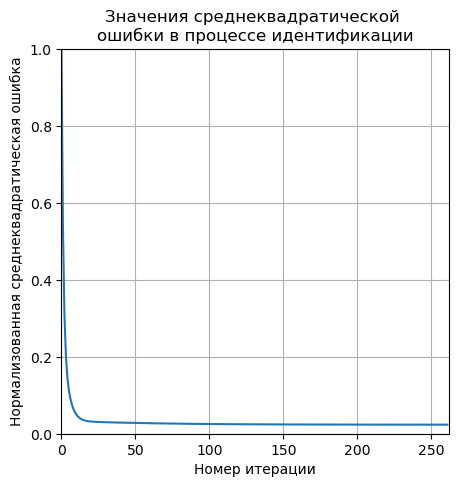

In [10]:
plot_loss_path(fs.fit_results_)

plt.show()

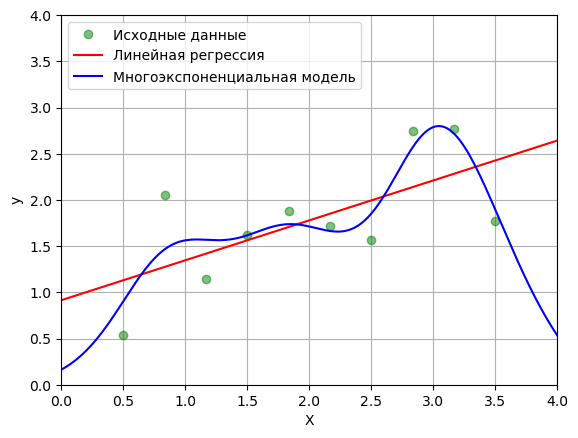

In [11]:
plt.plot(X, y, 'og', alpha = 0.5, label='Исходные данные')
plt.plot(X_regr, y_pred_lin_regr, '-r', label='Линейная регрессия')
plt.plot(X_regr, fs.predict(X_regr), '-b', label='Многоэкспоненциальная модель')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.grid()
plt.legend(loc='upper left')

plt.savefig('../images/overfitting_multiexp.pdf', bbox_inches='tight')

plt.show()

RMSE для модели многоэкспоненциального частотного скана

In [12]:
mean_squared_error(y, fs.predict(X), squared=False)

0.28303667833673285